# Accessing and Subsetting Variables

## Objectives

Introduce several alternative methods for accessing and subsetting the variables stored in the `Datasets` and `DataArrays` that store the ECCO v4 state estimate variables and grid parameters.

## Accessing variables inside `Dataset` and `DataArray` objects

There are two methods for accessing variables stored in `DataArray` and `Dataset` objects, the "dot" method and the "dictionary" method.  The syntax of these methods is as follows:

1. The "dot" method: e.g. ,`X.Y`
2. The "dictionary" method: e.g., `Y['Y']`

Both methods work identically to access *Dimensions*, *Coordinates*, and *Data variables*. Accessing *Attribute* variables requires a slightly different approach as we will see.

### Accessing *Data variables*, *Coordinates*, and *Data variables*

Let's demonstrate both methods by accessing the a *Data variable* from a `Dataset`.  First create the `Dataset`.

In [1]:
import matplotlib.pylab as plt
import numpy as np
import sys
import xarray as xr
from copy import deepcopy 
import ecco_v4_py as ecco
import warnings
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/'
var = 'SSH'
var_type = 'c'

ssh_all_tiles = ecco.load_all_tiles_from_netcdf(data_dir, var, var_type)
ecco.minimal_metadata(ssh_all_tiles)


>>> LOADING TILES FROM NETCDF

loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0001.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0002.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0003.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0004.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0005.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0006.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0007.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0008.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0009.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0010.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0011.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0012.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0013.nc
total file load time  0.547993898392 s
concatenated all tiles.  this ca

In [3]:
ssh_all_tiles

<xarray.Dataset>
Dimensions:   (i: 90, j: 90, tile: 13, time: 288)
Coordinates:
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * j         (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i         (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    tim       (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 ...
    timestep  (time) float64 732.0 1.428e+03 2.172e+03 2.892e+03 3.636e+03 ...
    lon_c     (tile, j, i) float64 -111.6 -111.3 -110.9 -110.5 -110.0 -109.3 ...
    lat_c     (tile, j, i) float64 -88.24 -88.38 -88.52 -88.66 -88.8 -88.94 ...
  * tile      (tile) int64 1 2 3 4 5 6 7 8 9 10 11 12 13
Data variables:
    SSH       (time, tile, j, i) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    description:    SSH -- ECCO v4 ocean state estimate, release 3 -- 1992-2015
    date:           02-May-2017
    Conventions:    CF-1.6
    _FillValue:     nan
    missing_value:  nan

Now we'll use the two methods to access the ``SSH`` `DataArray`,

In [4]:
ssh_A = ssh_all_tiles.SSH
ssh_B = ssh_all_tiles['SSH']

In [5]:
print type(ssh_A)
print type(ssh_B)

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


We access the `numpy` arrays stored in these `DataArrays` by invoking their `.values`.

In [6]:
ssh_arr = ssh_A.values
print type(ssh_arr)

<type 'numpy.ndarray'>


The shape of the `numpy` array can be found by invoking its `.shape`

In [7]:
ssh_arr.shape

(288, 13, 90, 90)

The order of these four dimensions is consistent with their ordering in the original `DataArray`,

In [8]:
ssh_A.dims

('time', 'tile', 'j', 'i')

``ssh_A`` and ``ssh_B`` are new variables but they are not **copies** of the original  ``SSH`` `DataArray` object, they both point to the original `numpy` array.  

We can confirm that ``ssh_A`` and ``ssh_B`` both refer to the same array in memory using the Python `is` command: 

In [9]:
ssh_A.values is ssh_B.values

True

### Accessing *Attribute* fields

Accessing *Attribute* variables using the dictionary method requires using the ``attrs`` variable field:

In [10]:
print ssh_all_tiles.date

02-May-2017


In [11]:
print ssh_all_tiles.attrs['date']

02-May-2017


## Subsetting variables using the [], .sel, and .isel syntaxes

So far, a considerable amount of attention has been placed on the *Coordinates* of `Dataset` and `DataArray` objects.  Why?  Labeled coordinates are certainly not necessary for calculations on the basic numerical arrays that store the ECCO state estimate fields.  The reason so much attention has been placed on coordinates is because the `xarray` offers several very useful methods for selecting (or indexing) subsets of data.

We'll introduce these indexing techniques  with `DataArray` objects first.  To begin let's make a new variable for the ``SSH`` `DataArray`.

In [12]:
ssh_da = ssh_all_tiles.SSH
type(ssh_da)

xarray.core.dataarray.DataArray

### Subsetting `numpy` arrays using the **[ ]** syntax

Subsetting `numpy` arrays is simple with the standard Python **[ ]** syntax.  To demonstrate, subset the first month and second tile of SSH.  

  > **Note:** *Note `numpy` array indexing starts with 0*

In [13]:
ssh_jan92_tile2 = ssh_arr[0,1,:,:]
ssh_jan92_tile2

array([[-1.43670821, -1.43574917, -1.43013549, ..., -1.35865545,
        -1.35119259, -1.34083176],
       [-1.3872236 , -1.38397408, -1.38146996, ..., -1.34370792,
        -1.3379215 , -1.32769942],
       [-1.34707379, -1.34317148, -1.34668505, ..., -1.32745349,
        -1.32351482, -1.31364846],
       ..., 
       [ 0.11865608,  0.11621492,  0.11381827, ...,         nan,
         0.39557076,  0.37189311],
       [ 0.09782931,  0.09542886,  0.09339471, ...,         nan,
         0.3994962 ,  0.38364425],
       [ 0.07686317,  0.07441767,  0.07261896, ...,         nan,
                nan,  0.38732299]])

The resulting subset is itself a `numpy` array,

In [14]:
type(ssh_jan92_tile2)

numpy.ndarray

of shape 90x90, as expected.

In [15]:
ssh_jan92_tile2.shape

(90, 90)

We can always use **[ ]** method to subset our `numpy` arrays.  It is a simple, direct method for accessing our fields.  Just for fun let's plot this SSH subset:

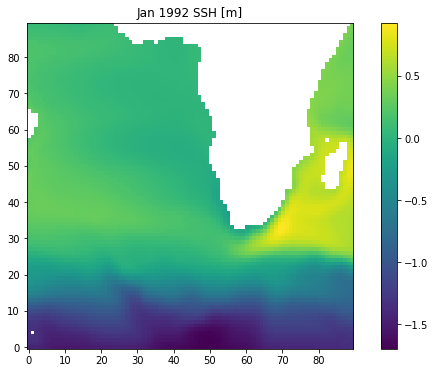

In [16]:
## origin='lower' is required so that y increases from bottom to top.
plt.imshow(ssh_jan92_tile2, origin='lower')
plt.colorbar()
plt.title('Jan 1992 SSH [m]')
plt.show()

### Subsetting `DataArrays` using the **[ ]** syntax

An interesting and useful alternative to subsetting `numpy` arrays with the **[ ]** method is to subset `DataArray` instead:

In [17]:
ssh_jan92_tile2_da = ssh_da[0,1,:,:]
ssh_jan92_tile2_da

<xarray.DataArray 'SSH' (j: 90, i: 90)>
array([[-1.436708, -1.435749, -1.430135, ..., -1.358655, -1.351193, -1.340832],
       [-1.387224, -1.383974, -1.38147 , ..., -1.343708, -1.337922, -1.327699],
       [-1.347074, -1.343171, -1.346685, ..., -1.327453, -1.323515, -1.313648],
       ..., 
       [ 0.118656,  0.116215,  0.113818, ...,       nan,  0.395571,  0.371893],
       [ 0.097829,  0.095429,  0.093395, ...,       nan,  0.399496,  0.383644],
       [ 0.076863,  0.074418,  0.072619, ...,       nan,       nan,  0.387323]])
Coordinates:
    time      float64 1.0
  * j         (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i         (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    tim       datetime64[ns] 1992-01-16
    timestep  float64 732.0
    lon_c     (j, i) float64 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 ...
    lat_c     (j, i) float64 -56.74 -56.74 -56.74 -56.74 -56.74 -56.74 ...
    tile      int64 2
Attributes:
    lon

The resulting `DataArray` is a subset of the original `DataArray`.  The subset has two fewer dimensions (**tile** and **time** have been eliminated). The horizontal dimensions **j** and **i** are unchanged.

Even though the **tile** and **time** dimensions have been eliminated, the dimensional and non-dimensional coordinates associated with **time** and **tile** remain.  In fact, these coordinates *tell us when in time and which tile our subset comes from*:

``
Coordinates:
    time      float64 1.0
    tim       datetime64[ns] 1992-01-16
    timestep  float64 732.0
    tile      int64 2
``

  > **Note:** *The **tile** coordinate is $2$ because coordinates are labels.

### Subsetting `DataArrays` using the **.sel( )** syntax

Another useful method for subsetting `DataArrays` is the **.sel( )** syntax.  The **.sel( )** syntax takes advantage of the fact that coordinates are labels.  We **sel**ect subsets of the `DataArray` by providing a subset of coordinate labels.

Let's select tile 2 and time (month) 1:

In [18]:
ssh_jan92_tile2_sel = ssh_da.sel(tile=2, time=1)
ssh_jan92_tile2_sel

<xarray.DataArray 'SSH' (j: 90, i: 90)>
array([[-1.436708, -1.435749, -1.430135, ..., -1.358655, -1.351193, -1.340832],
       [-1.387224, -1.383974, -1.38147 , ..., -1.343708, -1.337922, -1.327699],
       [-1.347074, -1.343171, -1.346685, ..., -1.327453, -1.323515, -1.313648],
       ..., 
       [ 0.118656,  0.116215,  0.113818, ...,       nan,  0.395571,  0.371893],
       [ 0.097829,  0.095429,  0.093395, ...,       nan,  0.399496,  0.383644],
       [ 0.076863,  0.074418,  0.072619, ...,       nan,       nan,  0.387323]])
Coordinates:
    time      float64 1.0
  * j         (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i         (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    tim       datetime64[ns] 1992-01-16
    timestep  float64 732.0
    lon_c     (j, i) float64 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 ...
    lat_c     (j, i) float64 -56.74 -56.74 -56.74 -56.74 -56.74 -56.74 ...
    tile      int64 2
Attributes:
    lon

### Subsetting `DataArrays` using the **.isel( )** syntax

The last subsetting method is **.isel( )** syntax.  **.isel( )** uses the numerical **index** of coordinates instead of their label.  Subsets are extraccted by providing a set of coordinate indices.

The equivalent syntax for subsetting tile 2 and month 1 with the **.isel( )** syntax is,

In [19]:
ssh_jan92_tile2_isel = ssh_da.isel(tile=1, time=0)
ssh_jan92_tile2_isel

<xarray.DataArray 'SSH' (j: 90, i: 90)>
array([[-1.436708, -1.435749, -1.430135, ..., -1.358655, -1.351193, -1.340832],
       [-1.387224, -1.383974, -1.38147 , ..., -1.343708, -1.337922, -1.327699],
       [-1.347074, -1.343171, -1.346685, ..., -1.327453, -1.323515, -1.313648],
       ..., 
       [ 0.118656,  0.116215,  0.113818, ...,       nan,  0.395571,  0.371893],
       [ 0.097829,  0.095429,  0.093395, ...,       nan,  0.399496,  0.383644],
       [ 0.076863,  0.074418,  0.072619, ...,       nan,       nan,  0.387323]])
Coordinates:
    time      float64 1.0
  * j         (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i         (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    tim       datetime64[ns] 1992-01-16
    timestep  float64 732.0
    lon_c     (j, i) float64 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 ...
    lat_c     (j, i) float64 -56.74 -56.74 -56.74 -56.74 -56.74 -56.74 ...
    tile      int64 2
Attributes:
    lon

### More examples of subsetting using the **[ ]**, **.sel( )** and **.isel( )** syntaxes

In the examples above we only subsetted a single month (Jan 1992) and a single tile (tile 2).  More complex subsetting is possible.  Here are some three examples that yield equivalent, more complex, subsets:

  > **Note:** Python array indexing goes up to but not including the final number in a range.  Because array indexing starts from 0, array index 41 corresponds to the 42nd element.

In [20]:
ssh_sub_bracket  = ssh_da[range(0,4), 1, 31:41, 5:22]
ssh_sub_isel     = ssh_da.isel(tile=1, time=[0,1,2,3], i=range(5,22), j=range(31,41))
ssh_sub_sel      = ssh_da.sel(tile=2, time=[1,2,3,4], i=range(6,23), j=range(32,42))

print ssh_sub_bracket.shape
print ssh_sub_isel.shape
print ssh_sub_sel.shape

(4, 10, 17)
(4, 10, 17)
(4, 10, 17)


In [21]:
print ssh_sub_bracket.coords

Coordinates:
  * time      (time) float64 1.0 2.0 3.0 4.0
  * j         (j) float64 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0
  * i         (i) float64 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 ...
    tim       (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 1992-04-16
    timestep  (time) float64 732.0 1.428e+03 2.172e+03 2.892e+03
    lon_c     (j, i) float64 -32.5 -31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5 ...
    lat_c     (j, i) float64 -35.99 -35.99 -35.99 -35.99 -35.99 -35.99 ...
    tile      int64 2


In [22]:
print ssh_sub_isel.coords

Coordinates:
  * time      (time) float64 1.0 2.0 3.0 4.0
  * j         (j) float64 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0
  * i         (i) float64 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 ...
    tim       (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 1992-04-16
    timestep  (time) float64 732.0 1.428e+03 2.172e+03 2.892e+03
    lon_c     (j, i) float64 -32.5 -31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5 ...
    lat_c     (j, i) float64 -35.99 -35.99 -35.99 -35.99 -35.99 -35.99 ...
    tile      int64 2


In [23]:
print ssh_sub_sel.coords

Coordinates:
  * time      (time) float64 1.0 2.0 3.0 4.0
  * j         (j) float64 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0
  * i         (i) float64 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 ...
    tim       (time) datetime64[ns] 1992-01-16 1992-02-16 1992-03-16 1992-04-16
    timestep  (time) float64 732.0 1.428e+03 2.172e+03 2.892e+03
    lon_c     (j, i) float64 -32.5 -31.5 -30.5 -29.5 -28.5 -27.5 -26.5 -25.5 ...
    lat_c     (j, i) float64 -35.99 -35.99 -35.99 -35.99 -35.99 -35.99 ...
    tile      int64 2


### Subsetting `Datasets` using the **.sel( )**, and **.isel( )** syntaxes

Amazingly, we can use the **.sel** and **.isel** methods to simultaneously subset multiple `DataArrays` stored within an single `Dataset`.  Let's make an interesting `Dataset` to subset and then test out the **.sel( )** and **.isel( )** subsetting methods.

In [24]:
# specify the location of your nctiles_monthly directory
data_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/'    
var = 'SSH'
var_type = 'c'
ssh_all_tiles = ecco.load_all_tiles_from_netcdf(data_dir, var, var_type)
ecco.minimal_metadata(ssh_all_tiles)

# specify the location of your nctiles_grid directory
grid_dir='/Volumes/ECCO_BASE/ECCO_v4r3/nctiles_grid/'
var = 'GRID'
var_type = 'grid'
grid_all_tiles = ecco.load_all_tiles_from_netcdf(grid_dir, var, var_type)
ecco.minimal_metadata(grid_all_tiles)

# Merge these datasets
output_all = xr.merge([ssh_all_tiles, grid_all_tiles])


>>> LOADING TILES FROM NETCDF

loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0001.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0002.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0003.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0004.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0005.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0006.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0007.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0008.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0009.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0010.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0011.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0012.nc
loading /Volumes/ECCO_BASE/ECCO_v4r3/nctiles_monthly/SSH/SSH.0013.nc
total file load time  0.46448302269 s
concatenated all tiles.  this can

Subset tile 2, j = 50 (a single row through the array), and time = 10 (October 1992)

In [25]:
output_tile2_time10_j50= output_all.sel(tile=2, time=10, j=50)
output_tile2_time10_j50

<xarray.Dataset>
Dimensions:   (i: 90, i_g: 90, j_g: 90, k: 50, k_g: 50)
Coordinates:
    time      float64 10.0
    j         float64 50.0
  * i         (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    tim       datetime64[ns] 1992-10-16
    timestep  float64 7.308e+03
    lon_c     (i) float64 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 ...
    lat_c     (i) float64 -20.12 -20.12 -20.12 -20.12 -20.12 -20.12 -20.12 ...
    tile      int64 2
  * k         (k) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * i_g       (i_g) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * j_g       (j_g) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_g       (k_g) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
Data variables:
    SSH       (i) float64 0.24 0.2457 0.2384 0.2285 0.2218 0.2173 0.2133 ...
    XC        (i) float64 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 -31.5 -30.5 ...
    YC        (i) float64 -20.12 -20.12 -2

All variables that had **tile, time**, or **j** coordinates have been subset while other variables are unchanged.  Let's plot the seafloor depth and sea surface height from west to east along j=50, (see plot at Line 16) which extends across the S. Atlantic, across Africa to Madagascar, and finally into to W. Indian Ocean.

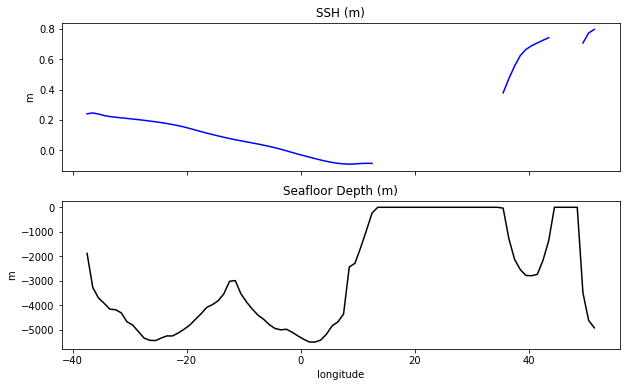

In [26]:
f, axarr = plt.subplots(2, sharex=True)
(ax1, ax2) = axarr
ax1.plot(output_tile2_time10_j50.lon_c, output_tile2_time10_j50.SSH,color='b')
ax1.set_ylabel('m')
ax1.set_title('SSH (m)')
ax2.plot(output_tile2_time10_j50.lon_c, -output_tile2_time10_j50.Depth,color='k')
ax2.set_xlabel('longitude')
ax2.set_ylabel('m')
ax2.set_title('Seafloor Depth (m)')
plt.show()

### Subsetting using **where( )**

The **where( )** method is quite different than other subsetting methods because  subsetting is done by masking out values with *nans* that do not meet some specified criteria.  

For more infomation about **where( )** see http://xarray.pydata.org/en/stable/indexing.html#masking-with-where

Let's demonstrate **where** by masking out all SSH values that do not fall within a box defined between 20S to 60N and 50W to 10E.

First, we'll extract the ``SSH`` `DataArray`

In [27]:
ssh_da=output_all.SSH

Create a matrix that is `True` where latitude is between 20S and 60N and `False` otherwise.

In [28]:
lat_bounds = np.logical_and(ssh_da.lat_c  > -20, ssh_da.lat_c < 60)

Create a matrix that is `True` where longitude is between 50W and 10E and `False` otherwise.

In [29]:
lon_bounds = np.logical_and(ssh_da.lon_c  > -50, ssh_da.lon_c < 10)

Combine the ``lat_bounds`` and ``lon_bounds`` logical matrices:

In [30]:
lat_lon_bounds = np.logical_and(lat_bounds, lon_bounds)

Finally, use **where** to mask out all SSH values that do not fall within our  ``lat_lon_bounds``

In [31]:
ssh_da_subset_space = ssh_da.where(lat_lon_bounds)

To visualize the SSH in our box we'll use one of our ECCO v4 custom plotting routines (which will be the subject of another tutorial).  

Notice the use of **.sel( )** to subset a single time slice (time=1) for plotting.

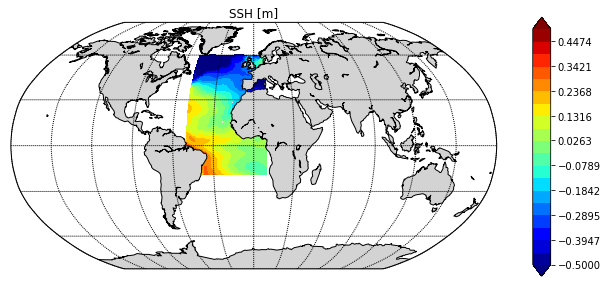

In [32]:
ecco.plot_tiles_proj(ssh_da.lon_c, ssh_da.lat_c, 
                     ssh_da_subset_space.sel(time=1), 
                     plot_type='contourf', lon_0=180, 
                     cmin=-.5, cmax=.5, cbar=True);
plt.title('SSH [m]')
plt.show()

## Conclusion

You now know several different methods for accessing and subsetting fields in `Dataset` and `DataArray` objects.    

To learn a more about indexing/subsetting methods please refer to the `xarray` manual for indexing methods, http://xarray.pydata.org/en/stable/indexing.html.  